In [11]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import random

In [12]:
yf.pdr_override()
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2022, 11, 1)

df_ibov = web.get_data_yahoo('^BVSP',start,end)

df_ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,116016.0,116203.0,114626.0,114626.0,114626.0,14727200
2022-10-26,114626.0,114626.0,112577.0,112764.0,112764.0,16088200
2022-10-27,112766.0,116236.0,112765.0,114641.0,114641.0,15530800
2022-10-28,114636.0,114712.0,113336.0,114539.0,114539.0,14392400
2022-10-31,114533.0,116763.0,112113.0,116037.0,116037.0,21637900


In [13]:
options = webdriver.ChromeOptions()
prefs ={"download.default_directory":"Users/juliocarvalho/Downloads/"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
driver.get ("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element("link text",'Download')
btn_download.click()

time.sleep(3)

driver.close()

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1383/2118955479.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1383/2118955479.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)


In [14]:
df = pd.read_csv("/Users/juliocarvalho/Desktop/Repositorio/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)
df.head()
df.info()
df.index[:-2]

ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa =" ".join(list(ativos))

ativos_sa

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         92 non-null     object 
 1   Acao           92 non-null     object 
 2   Tipo           94 non-null     object 
 3   Qtde.STeorica  93 non-null     object 
 4   Part.(%)       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1383/833026479.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/juliocarvalho/Desktop/Repositorio/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)


'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA RENT3.SA LWSA3.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RAIZ4.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA SMTO3.SA CSNA3.SA SLCE3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [26]:
yf.pdr_override()
cotacoes_ativos = yf.download(tickers=ativos_sa,period='1Y')
cotacoes_ativos['Adj Close'].info()
cotacoes_ativos.head()
cotacoes_ativos_fechamentos =cotacoes_ativos['Adj Close']
#Removendo NAN
cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


[*********************100%***********************]  92 of 92 completed
[*********************102%************************]  94 of 92 completed<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-18 to 2022-11-18
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   251 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA 

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1383/3882203413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_1383/3882203413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


[********************************145%**********************************]  133 of 92 completed

In [27]:
cotacoes_ativos_fechamentos.info()

percentual_alteracao = cotacoes_ativos_fechamentos.pct_change()
percentual_alteracao

percentual_acumulado = ( 1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0]= 1
percentual_acumulado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-18 to 2022-11-18
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   251 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA   251 non-null    float64
 17  BRML3.SA   251 non-null    float64
 18  CASH3.SA   251 non-null    float64
 19  CCRO3.SA   251 non-null    floa

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-11-19,0.988068,1.000465,1.005692,1.041233,1.007153,1.014620,1.000000,0.998625,1.001708,0.999027,...,1.051482,0.998869,1.005177,1.014073,1.027274,0.998649,1.025090,1.068118,0.996381,0.975610
2021-11-22,0.984091,0.957007,0.939485,1.003699,0.986409,0.994152,0.970329,0.993125,0.988610,0.981995,...,1.069423,0.936086,0.978550,1.043874,1.084389,0.982432,1.023298,1.046352,0.965200,0.949042
2021-11-23,0.977273,0.937950,0.937388,0.973562,0.991416,0.983187,0.960706,1.034648,1.013098,1.000973,...,1.081123,0.889423,1.027367,1.093543,1.112947,1.010360,1.060932,1.027811,0.951002,0.928136
2021-11-24,0.971591,0.939345,0.958059,0.976712,0.981402,0.970760,0.977546,1.053814,1.031321,1.026764,...,1.088144,0.908371,1.023669,1.131623,1.138777,0.995496,1.051971,1.023176,0.933463,0.945558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,0.949883,0.387951,0.373135,1.216794,1.395355,0.475512,1.057640,1.312416,0.846168,0.840069,...,1.116351,0.888505,1.077560,0.711263,1.442222,0.789803,0.437276,0.892693,1.132561,0.561715
2022-11-14,0.941618,0.397054,0.383220,1.236686,1.413383,0.506579,1.048392,1.344930,0.852677,0.840623,...,1.110613,0.931276,1.059035,0.691825,1.459921,0.791660,0.455197,0.872415,1.151536,0.547672
2022-11-16,0.911510,0.392152,0.345631,1.206007,1.416267,0.478070,1.042507,1.302439,0.846819,0.843396,...,1.077008,0.863127,0.994196,0.694476,1.444676,0.769385,0.424731,0.846958,1.096310,0.543722


In [28]:
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira

carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo']= carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos

,CASH3.SA,SBSP3.SA,AMER3.SA,MRVE3.SA,ITSA4.SA,saldo,retorno
Date,,,,,,,
2021-11-18,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-11-19,968.292712,1015.684048,1005.691957,1022.550013,998.996112,5011.214843,0.002243
2021-11-22,897.561013,994.481585,939.484691,995.663570,988.955823,4816.146680,-0.038926
2021-11-23,848.780512,999.419126,937.387657,996.530821,997.992107,4780.110223,-0.007482
2021-11-24,839.024424,993.900711,958.058626,991.327052,1013.771837,4796.082650,0.003341
...,...,...,...,...,...,...,...
2022-11-11,268.292695,1678.082076,373.135055,814.560218,1089.631202,4223.701245,0.000984
2022-11-14,297.560990,1714.252786,383.219784,827.373557,1103.189918,4325.597035,0.024125
2022-11-16,275.609761,1689.941358,345.631255,790.764142,1083.468106,4185.414622,-0.032408


In [29]:
ibov = yf.download('BOVA11.SA', period='1y') ['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov


[*********************100%***********************]  1 of 1 completed


Date
2021-11-18    5000.000000
2021-11-19    5031.423979
2021-11-22    4979.219277
2021-11-23    5068.423642
2021-11-24    5101.875423
                 ...     
2022-11-11    5501.774018
2022-11-14    5580.841303
2022-11-16    5374.556476
2022-11-17    5356.817071
2022-11-18    5314.242111
Name: Adj Close, Length: 251, dtype: float64

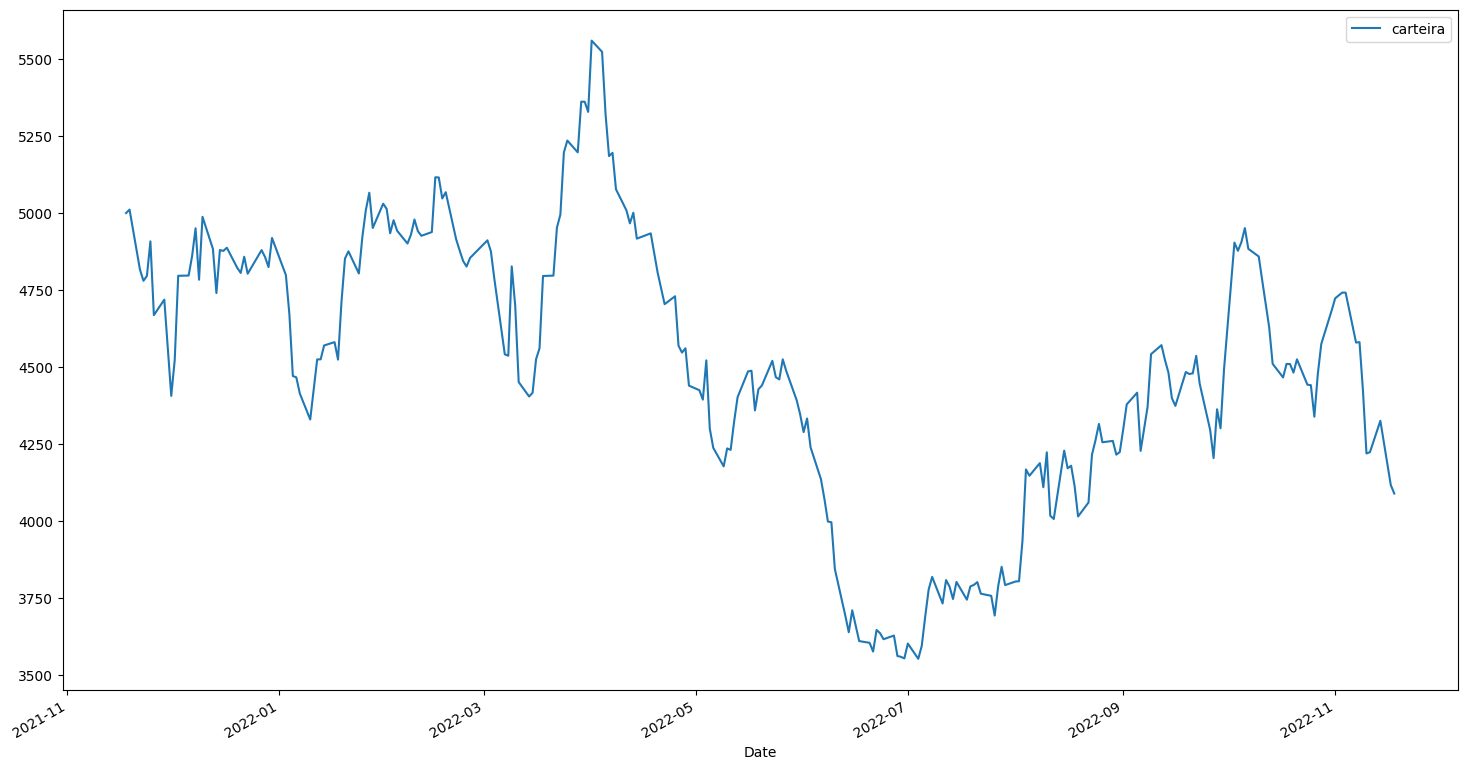

In [30]:
carteira_ativos['saldo'].plot(figsize=(18,10), label= "carteira")
plt.legend()